# V Short-list promising models

This notebook assumes, that notebook 4_prepare_California_housing.ipynb (Version from 9th March 6:39pm) has been successfully executed.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
import os
result_path = '../results'
get_path = lambda fn: os.path.join(result_path, fn)
get_path('X_train.csv')

'../results/X_train.csv'

In [3]:
X_train = pd.read_csv(get_path('X_train.csv'), index_col=0)
y_train = pd.read_csv(get_path('y_train.csv'), index_col=0, )
X_train.shape, y_train.shape

((16512, 16), (16512, 1))

In [4]:
X_train.head(5)

,num_pipeline__longitude,num_pipeline__latitude,num_pipeline__housing_median_age,num_pipeline__total_rooms,num_pipeline__total_bedrooms,num_pipeline__population,num_pipeline__households,num_pipeline__median_income,num_pipeline__rooms_per_household,num_pipeline__population_per_household,num_pipeline__bedrooms_per_room,cat_pipeline__<1H OCEAN,cat_pipeline__INLAND,cat_pipeline__ISLAND,cat_pipeline__NEAR BAY,cat_pipeline__NEAR OCEAN
1862,-2.281365,2.887619,-0.927305,0.292908,0.217002,1.856885,0.224303,-0.830593,0.060497,0.255269,-0.346868,0.0,0.0,0.0,0.0,1.0
18832,-1.668419,2.836182,-0.450447,0.633004,0.608756,0.181753,0.313571,-0.793651,0.402002,-0.039779,-0.260680,0.0,1.0,0.0,0.0,0.0
2488,-0.387710,0.236288,-1.563116,0.015231,0.262388,0.050336,0.108780,-1.135007,-0.193990,-0.030870,0.450124,0.0,1.0,0.0,0.0,0.0
7637,0.638850,-0.848560,-0.609400,0.800987,0.869129,1.106054,1.085476,-0.225916,-0.246395,-0.013438,-0.128123,1.0,0.0,0.0,0.0,0.0
6941,0.733532,-0.769067,0.185363,-0.767771,-0.764773,-0.725026,-0.770771,-0.602847,-0.291004,-0.016668,0.176319,1.0,0.0,0.0,0.0,0.0


In [5]:
y_train.head()

,median_house_value
1862,103100.0
18832,62000.0
2488,60400.0
7637,218800.0
6941,190300.0


# V.1 Train many quick and dirty models from different categories

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5].copy()
some_labels

,median_house_value
1862,103100.0
18832,62000.0
2488,60400.0
7637,218800.0
6941,190300.0


In [8]:
some_labels['lin_reg'] = lin_reg.predict(some_data)
some_labels

,median_house_value,lin_reg
1862,103100.0,34237.426840
18832,62000.0,56740.749372
2488,60400.0,91260.890218
7637,218800.0,205728.067852
6941,190300.0,171932.014917


In [9]:
lin_reg.coef_

array([[ -56289.4638135 ,  -57085.82196785,   13450.03095834,
           -259.6224612 ,    3827.01896945,  -45231.43801855,
          46402.59631287,   75639.31304423,    6985.14667415,
            937.94830062,   11054.18968327,  -35392.92914446,
         -71178.81419452,  179033.03419745,  -40804.38907583,
         -31656.90178263]])

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
some_labels['tree_reg'] = tree_reg.predict(some_data)
some_labels

,median_house_value,lin_reg,tree_reg
1862,103100.0,34237.426840,103100.0
18832,62000.0,56740.749372,62000.0
2488,60400.0,91260.890218,60400.0
7637,218800.0,205728.067852,218800.0
6941,190300.0,171932.014917,190300.0


### Random Forrest

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, np.ravel(y_train))
some_labels['forest_reg'] = forest_reg.predict(some_data)
some_labels

,median_house_value,lin_reg,tree_reg,forest_reg
1862,103100.0,34237.426840,103100.0,88650.0
18832,62000.0,56740.749372,62000.0,64550.0
2488,60400.0,91260.890218,60400.0,63140.0
7637,218800.0,205728.067852,218800.0,212240.0
6941,190300.0,171932.014917,190300.0,182630.0


### Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor()
boost_reg.fit(X_train, np.ravel(y_train))
some_labels['boost_reg'] = boost_reg.predict(some_data)
some_labels

,median_house_value,lin_reg,tree_reg,forest_reg,boost_reg
1862,103100.0,34237.426840,103100.0,88650.0,117670.706405
18832,62000.0,56740.749372,62000.0,64550.0,88325.568957
2488,60400.0,91260.890218,60400.0,63140.0,71236.364819
7637,218800.0,205728.067852,218800.0,212240.0,200150.879187
6941,190300.0,171932.014917,190300.0,182630.0,157175.721458


## V.2 Measure and compare their performance

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, np.ravel(y_train),
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([ 67773.19613269,  69515.91437788,  71190.78995641,  65187.96182696,
        64963.500376  ,  69325.01895368,  69666.52258032,  69287.90589261,
        69855.28360821,  66187.57655787])

In [14]:
lin_rmse_scores.mean(), lin_rmse_scores.std()

(68295.367026263237, 2042.1723511835505)

In [15]:
y_train.mean()

median_house_value    206744.758721
dtype: float64

In [16]:
cv_scores = lambda reg: cross_val_score(reg, X_train, np.ravel(y_train),
                         scoring="neg_mean_squared_error", cv=10)
np.sqrt(-cv_scores(lin_reg))

array([ 67773.19613269,  69515.91437788,  71190.78995641,  65187.96182696,
        64963.500376  ,  69325.01895368,  69666.52258032,  69287.90589261,
        69855.28360821,  66187.57655787])

In [17]:
globals()['lin_reg']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Get names of trained regressors, which follow the naming convention
regressors = [var for var in globals().keys() if var.endswith('_reg')]
regressors

['lin_reg', 'tree_reg', 'forest_reg', 'boost_reg']

In [19]:
scores = dict([(var,np.sqrt(-cv_scores(globals()[var]))) for var in regressors])
scores

{'boost_reg': array([ 53198.32962494,  53213.29222086,  55253.32070901,  51526.75799148,
         51318.14375948,  52780.42043386,  51162.29548897,  53746.17425045,
         53383.88382043,  51685.28186885]),
 'forest_reg': array([ 52869.31273423,  53981.949039  ,  53215.79680729,  50917.15769238,
         50914.18461263,  53209.46378058,  52413.84563118,  53730.48540596,
         53232.93049008,  50643.88606094]),
 'lin_reg': array([ 67773.19613269,  69515.91437788,  71190.78995641,  65187.96182696,
         64963.500376  ,  69325.01895368,  69666.52258032,  69287.90589261,
         69855.28360821,  66187.57655787]),
 'tree_reg': array([ 70274.58562517,  70718.71476457,  68320.63194259,  68311.29562997,
         72660.48228277,  71209.95114208,  69052.12056122,  71601.0096192 ,
         72742.47109718,  70464.0859852 ])}

In [20]:
performance = pd.DataFrame(scores)
performance

,boost_reg,forest_reg,lin_reg,tree_reg
0,53198.329625,52869.312734,67773.196133,70274.585625
1,53213.292221,53981.949039,69515.914378,70718.714765
2,55253.320709,53215.796807,71190.789956,68320.631943
3,51526.757991,50917.157692,65187.961827,68311.295630
4,51318.143759,50914.184613,64963.500376,72660.482283
5,52780.420434,53209.463781,69325.018954,71209.951142
6,51162.295489,52413.845631,69666.522580,69052.120561
7,53746.174250,53730.485406,69287.905893,71601.009619
8,53383.883820,53232.930490,69855.283608,72742.471097
9,51685.281869,50643.886061,66187.576558,70464.085985


In [21]:
performance.aggregate(['mean', 'std'])

,boost_reg,forest_reg,lin_reg,tree_reg
mean,52726.790017,52512.901225,68295.367026,70535.534865
std,1302.686435,1241.444837,2152.638668,1603.342005


## V.3 Analyze the most significant variables

In [22]:
forest_reg.feature_importances_

array([  5.84163001e-02,   5.37903687e-02,   4.54838907e-02,
         1.07011472e-02,   1.22546064e-02,   1.06295601e-02,
         9.62360079e-03,   4.84580968e-01,   2.69902978e-02,
         1.19306745e-01,   2.37619634e-02,   1.08001631e-03,
         1.40052344e-01,   2.42662593e-04,   6.09873187e-04,
         2.47565580e-03])

In [23]:
importance = pd.DataFrame(dict([(var, globals()[var].feature_importances_) 
                                for var in ['forest_reg', 'boost_reg', 'tree_reg']]),
                          index = X_train.columns)

In [24]:
importance.sort_values(by='forest_reg', ascending=False)

,boost_reg,forest_reg,tree_reg
num_pipeline__median_income,0.177657,0.484581,0.480132
cat_pipeline__INLAND,0.039090,0.140052,0.135154
num_pipeline__population_per_household,0.096147,0.119307,0.121851
num_pipeline__longitude,0.233324,0.058416,0.065167
num_pipeline__latitude,0.190719,0.053790,0.055434
num_pipeline__housing_median_age,0.076017,0.045484,0.044497
num_pipeline__rooms_per_household,0.053431,0.026990,0.027684
num_pipeline__bedrooms_per_room,0.014402,0.023762,0.023257
num_pipeline__total_bedrooms,0.027368,0.012255,0.011097
num_pipeline__total_rooms,0.012554,0.010701,0.010506


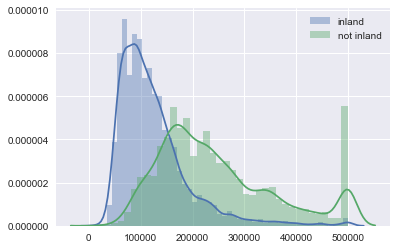

In [25]:
is_inland = X_train.cat_pipeline__INLAND == 1
sns.distplot(y_train[is_inland], label='inland')
sns.distplot(y_train[~is_inland], label='not inland')
plt.legend()

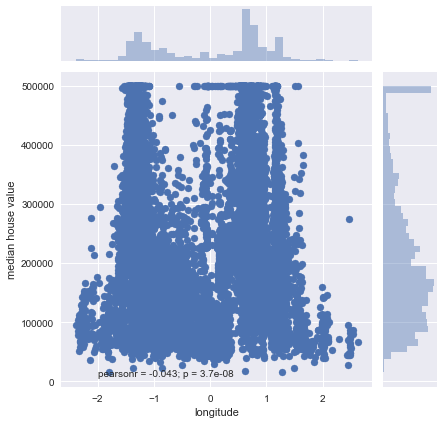

In [26]:
sns.jointplot('longitude', 'median house value',
              data = pd.DataFrame({'longitude': X_train['num_pipeline__longitude'],
                                  'median house value': y_train['median_house_value']})
             )

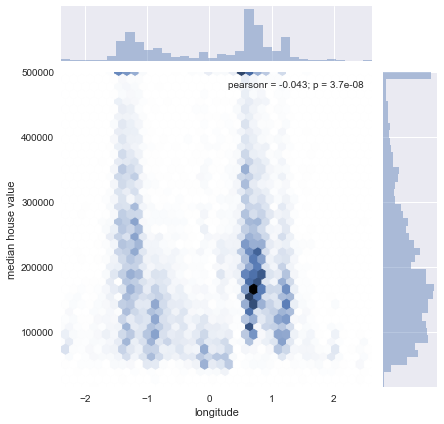

In [27]:
sns.jointplot('longitude', 'median house value',
              data = pd.DataFrame({'longitude': X_train['num_pipeline__longitude'],
                                  'median house value': y_train['median_house_value']}),
              kind='hex'
             )

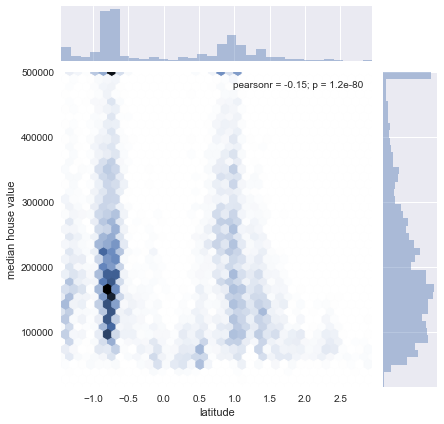

In [28]:
sns.jointplot('latitude', 'median house value',
              data = pd.DataFrame({'latitude': X_train['num_pipeline__latitude'],
                                  'median house value': y_train['median_house_value']}),
              kind='hex'
             )

## V.4 Analyze the types of errors the models make

In [29]:
from sklearn.model_selection import cross_val_predict
out_of_sample = cross_val_predict(forest_reg, X_train, np.ravel(y_train),
                                  cv=10)
out_of_sample.shape

(16512,)

In [30]:
np.ravel(y_train)-out_of_sample

array([ -27860. ,  -15410. ,   -8180. , ...,  -66010.1, -138120. ,  -22550. ])

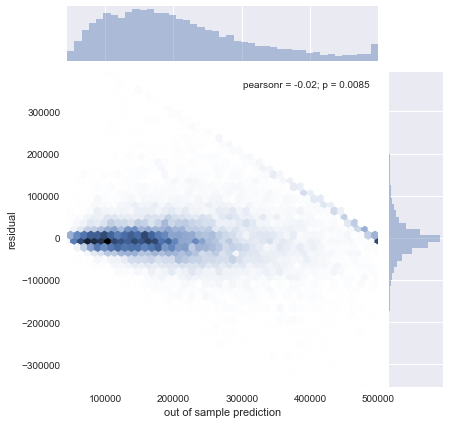

In [31]:
sns.jointplot('out of sample prediction', 'residual',
              data = pd.DataFrame({'out of sample prediction': out_of_sample,
                                  'residual': np.ravel(y_train)-out_of_sample}),
              kind='hex'
             )

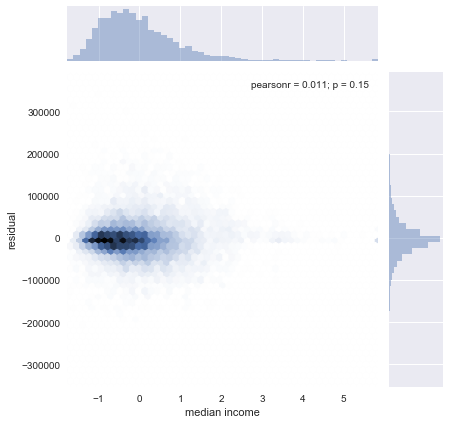

In [32]:
sns.jointplot('median income', 'residual',
              data = pd.DataFrame({'median income': X_train['num_pipeline__median_income'],
                                  'residual': np.ravel(y_train)-out_of_sample}),
              kind='hex'
             )

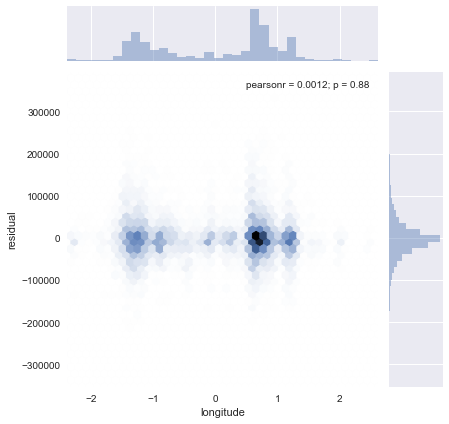

In [33]:
sns.jointplot('longitude', 'residual',
              data = pd.DataFrame({'longitude': X_train['num_pipeline__longitude'],
                                  'residual': np.ravel(y_train)-out_of_sample}),
              kind='hex'
             )

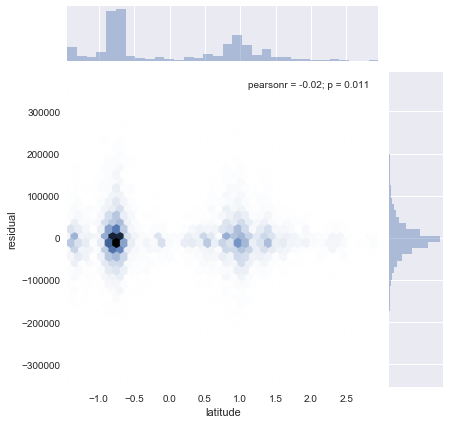

In [34]:
sns.jointplot('latitude', 'residual',
              data = pd.DataFrame({'latitude': X_train['num_pipeline__latitude'],
                                  'residual': np.ravel(y_train)-out_of_sample}),
              kind='hex'
             )

## V.5 Have a quick round of feature selection and engineering

In [35]:
from tsfresh.transformers.feature_selector import FeatureSelector

/Users/obi/02-ProjectSupport/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
selector = FeatureSelector(test_for_binary_target_real_feature='smir',
                           test_for_real_target_binary_feature='smir')
selector.fit(X_train.values, np.ravel(y_train))

FeatureSelector(chunksize=None, fdr_level=0.05, hypotheses_independent=False,
        ml_task='auto', n_jobs=2,
        test_for_binary_target_binary_feature='fisher',
        test_for_binary_target_real_feature='smir',
        test_for_real_target_binary_feature='smir',
        test_for_real_target_real_feature='kendall')

In [37]:
selector.p_values

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   5.47572708e-269,   1.48020142e-244,
         4.80649932e-158,   3.26855460e-100,   4.51741890e-060,
         1.51882050e-058,   2.13871222e-048,   6.62564548e-028,
         6.65225584e-024,   1.78902399e-019,   3.84976140e-003,
         5.08493672e-001])

## V.6 Have one or two more quick iterations of the five previous steps

## V.7 Short-list the top three to five most promising models
Prefer models that make different types of errors.